#### XGBoost는  "Extreme Gradient Boosting"의 약자로, 결정 트리 기반의 그래디언트 부스팅 알고리즘입니다.
#### XGBoost는 효율성, 유연성, 이식성을 목표로 설계되었으며,
#### 다양한 머신러닝 경진대회에서 우수한 성능을 보여주고 있습니다


#### XGBoost의 구조

    XGBoost는 여러 개의 결정 트리(Decision Tree)로 구성됩니다
    
    각 결정 트리는 이전 트리의 예측 오류를 보완하는 방식으로 학습됩니다.
    
    각 트리의 예측 결과를 가중합하여 최종 예측을 수행합니다.

#### **XGBoost의 원리** 
<br>
      
**초기 모델 학습**: 첫 번째 결정 트리를 학습시켜 초기 모델을 만듭니다.   
                   이 트리는 데이터의 특성을 기반으로 분류나 회귀를 수행합니다.

**잔여 오차 계산**: 초기 모델의 예측 결과와 실제 값 간의 잔여 오차(실제 값에서 예측 값을 뺀 값)를 계산합니다.   
                    이 잔여 오차는 모델이 잘못 예측한 부분을 나타냅니다.

**잔여 오차 학습**: **잔여 오차를 예측하는 새로운 결정 트리를 학습**시킵니다.   
                    이 단계에서는 이전 모델이 잘못 예측한 부분을 보완하기 위해 새로운 트리가 학습됩니다.  

**모델 업데이트**: 새로운 결정 트리를 기존 모델에 추가하여 모델을 업데이트합니다.   
                  각 트리는 이전 모델의 오류를 줄이는 데 기여하게 됩니다.

**반복**        : 잔여 오차가 충분히 작아질 때까지 2~4 단계를 반복합니다.   
                  이를 통해 모델의 예측 성능이 점점 향상되고, 여러 개의 트리가 결합된 강력한 모델이 만들어집니다.

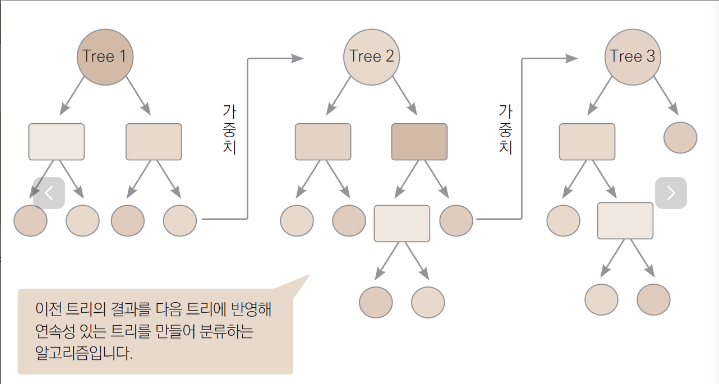

### XGBoost의 하이퍼파라미터

In [ ]:



1. n_estimators
역할: 트리의 개수 (모델에서 사용할 부스팅 반복 횟수).
범위: 보통 100에서 1000까지 설정 가능.
100, 200, 300, ... 또는 더 높은 값으로 설정.
기본값: 100

주의사항:
n_estimators 값이 너무 크면 학습 시간이 길어지고 과적합(overfitting)이 발생할 수 있음.
learning_rate와 적절히 조정해야 함. 작은 learning_rate일 경우 n_estimators 값을 크게 설정해야 효과적.
권장: 값이 너무 클 경우 조기 종료 기능(early_stopping_rounds)을 사용하여 과적합을 방지.


2. learning_rate
역할: 학습 속도를 제어하며, 각 트리가 이전 트리의 학습 결과에 얼마나 영향을 미치는지 조정.
범위: 0.01에서 0.3까지 사용.
매우 작은 값: 0.01, 0.05
일반적인 값: 0.1, 0.2
큰 값: 0.3
기본값: 0.3
    
주의사항:
작은 학습률: 학습률이 낮을수록 더 많은 부스팅 라운드가 필요하고, 학습 시간이 길어짐. 
성능이 좋아질 수 있지만 과도하게 낮은 값은 학습이 너무 느릴 수 있음.
큰 학습률: 너무 높으면 모델이 빠르게 수렴하나, 최적의 해에 도달하지 못하고 성능이 저하될 위험이 있음.
권장: 일반적으로 0.1이 적절한 시작점이며, 더 낮은 값을 시도할 때는 n_estimators를 증가시켜야 함.

    
3. max_depth
역할: 개별 트리의 최대 깊이를 제어하여 트리의 복잡도를 제한함. 값이 높을수록 모델이 더 복잡해지고, 오버피팅할 가능성이 커짐.
범위: 3에서 10까지 주로 설정.
작은 값: 3, 5 (간단한 모델)
큰 값: 7, 9, 10 (복잡한 모델)
기본값: 6

주의사항:
값이 크면 트리가 깊어져 복잡한 모델이 되고, 과적합의 위험이 커짐.
값이 너무 작으면 모델이 데이터를 충분히 학습하지 못하고, 과소적합(underfitting) 발생 가능.
권장: 일반적으로 3에서 6이 적절하며, 복잡한 데이터에서는 7 이상을 고려할 수 있음. 

    
4. subsample
역할: 각 트리마다 사용할 데이터 샘플의 비율을 설정하여 모델의 과적합을 방지.
범위: 0.5에서 1.0까지 설정.
낮은 값: 0.5, 0.6 (더 작은 샘플 사용)
보통 값: 0.8, 1.0
기본값: 1.0 (전체 데이터를 사용
         
주의사항:
낮은 값: 값이 낮으면 일부 데이터만 사용하므로 편차가 커지고, 성능이 떨어질 수 있음.
높은 값: 값이 1.0에 가까울수록 모든 데이터를 사용하여 모델이 더 안정적이지만, 과적합 위험이 있음.
권장: 기본값인 1.0에서 시작하고, 과적합이 우려된다면 0.8 정도로 줄이는 것이 좋음.
          

5. colsample_bytree
역할: 각 트리마다 사용할 피처(특성)의 비율을 설정하여 모델의 다양성을 높임.
범위: 0.3에서 1.0까지 설정.
작은 값: 0.3, 0.5 (적은 피처 사용)
보통 값: 0.8, 1.0
기본값: 1.0 (모든 피처 사용)
그 외 자주 튜닝하는 하이퍼파라미터

주의사항:
낮은 값: 특성(피처)을 무작위로 선택하여 다양성을 높일 수 있지만, 과소적합의 가능성이 있음.
높은 값: 모든 특성을 사용하는 것이기 때문에 모델의 복잡도가 높아져 과적합 위험이 있음.
권장: 0.8 또는 1.0에서 시작하고, 과적합 문제가 생기면 이 값을 낮춰 볼 것.

          
6. gamma
역할: 노드가 분할되기 위한 최소 손실 감소량을 설정하여 과적합을 방지함.
범위: 0에서 5 또는 더 높은 값까지 설정 가능.
작은 값: 0, 0.1, 0.2
큰 값: 1, 5 (노드 분할에 더 엄격)
기본값: 0

주의사항:
낮은 값: 값이 낮으면 노드가 더 자주 분할되고 모델이 복잡해질 수 있음. 과적합 위험이 증가할 수 있음.
높은 값: 값이 높을수록 노드 분할이 더 엄격하게 이루어져 모델의 복잡도가 줄어듦. 
         그러나 과도하게 높으면 학습이 제대로 이루어지지 않을 수 있음.
권장: 일반적으로 0에서 시작하고, 과적합이 우려되면 값을 서서히 증가시켜야 함.

          
7. min_child_weight
역할: 리프 노드에서 필요한 최소 가중치 합을 설정하여 과적합을 방지.
범위: 1에서 10까지 설정.
작은 값: 1, 3
큰 값: 5, 7 (노드가 더 많은 샘플을 포함하도록 함)
기본값: 1

주의사항:
작은 값: 노드 분할이 더 자유로워져 모델이 복잡해지고, 과적합 위험이 증가할 수 있음.
큰 값: 노드가 분할되지 않으면 간단한 모델이 되어 과소적합이 발생할 수 있음.
권장: 데이터가 희소하거나 불균형할 경우, 더 높은 값을 선택하여 과적합을 방지할 수 있음.    

          
8. lambda (L2 정규화 항)
역할: 가중치에 대한 L2 정규화를 적용하여 모델의 복잡성을 줄임.
범위: 0에서 1 이상.
작은 값: 0, 0.1
큰 값: 1, 5, 10
기본값: 1

주의사항:
정규화 항이 크면 가중치의 크기가 제한되어 모델이 더 일반화되고 과적합을 방지할 수 있음.
과도하게 큰 값은 학습 성능을 저하시킬 수 있음.
권장: 1에서 시작하고 성능을 모니터링하여 조정.    

          
9. alpha (L1 정규화 항)
역할: 가중치에 대한 L1 정규화를 적용하여 희소성을 증가시킴.
범위: 0에서 1 이상.
작은 값: 0, 0.1
큰 값: 1, 5, 10
기본값: 0

주의사항:
L1 정규화는 모델의 희소성을 증가시켜 과적합을 방지하지만, 너무 큰 값은 중요한 특성까지 무시할 수 있음.
권장: 0에서 시작하고, 불필요한 특성이 많을 때 점진적으로 값을 증가시킬 수 있음.

          
이러한 하이퍼파라미터의 범위를 설정하여 GridSearchCV나 RandomizedSearchCV를 통해 최적의 조합을 찾는 것이 일반적이다.

### 모델의 하이퍼파라미터를 찾는 방식

#### GridSearchCV
    주어진 모든 조합의 하이퍼파라미터를 시도해 보고, 가장 성능이 좋은 조합을 찾는 방식

#### RandomizedSearchCV
    랜덤으로 일부 조합을 선택해서 평가. 모든 데이터를 비교하지 않지만,
    계산량이 줄어들고, 더 빠르게 결과를 얻을 수 있음

In [2]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import pandas as pd

In [3]:
titanic_encoded = pd.read_csv('titanic_encoded.csv')

In [4]:
titanic_encoded

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,...,family_size,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman,class_First,class_Second,class_Third
0,0,0,3,0,22.0,1,0,7.2500,2,True,...,2,False,False,True,False,True,False,False,False,True
1,1,1,1,1,38.0,1,0,71.2833,0,False,...,2,True,False,False,False,False,True,True,False,False
2,2,1,3,1,26.0,0,0,7.9250,2,False,...,1,False,False,True,False,False,True,False,False,True
3,3,1,1,1,35.0,1,0,53.1000,2,False,...,2,False,False,True,False,False,True,True,False,False
4,4,0,3,0,35.0,0,0,8.0500,2,True,...,1,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,0,27.0,0,0,13.0000,2,True,...,1,False,False,True,False,True,False,False,True,False
887,887,1,1,1,19.0,0,0,30.0000,2,False,...,1,False,False,True,False,False,True,True,False,False
888,888,0,3,1,28.0,1,2,23.4500,2,False,...,4,False,False,True,False,False,True,False,False,True
889,889,1,1,0,26.0,0,0,30.0000,0,True,...,1,True,False,False,False,True,False,True,False,False


In [5]:
titanic_encoded.isnull().sum()

Unnamed: 0                 0
survived                   0
pclass                     0
sex                        0
age                        0
sibsp                      0
parch                      0
fare                       0
embarked                   0
adult_male                 0
alive                      0
alone                      0
family_size                0
embark_town_Cherbourg      0
embark_town_Queenstown     0
embark_town_Southampton    0
who_child                  0
who_man                    0
who_woman                  0
class_First                0
class_Second               0
class_Third                0
dtype: int64

In [ ]:
# 타이다닉 데이터 
# 특성과 타겟 변수 분리
# 승객이 생존했는지 여부를 판단하는 이진 분류데이터로 만들기 위함
# y는 타깃 변수인 생존 여부를 나타내며, 모델이 예측할 값을 포함

X = titanic_encoded.drop(['survived'], axis=1)
y = titanic_encoded['survived']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (선택사항)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# K-Fold 교차검증 설정 
# 과적합 방지
# 5개의 폴드로 변환
kfold = KFold(n_splits=10, shuffle=True, random_state=42) 

In [ ]:
# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier()

In [ ]:
# 튜닝할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50 ,100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],         # 0~1사이의 숫자를 지정
    'colsample_bytree': [0.8, 1.0]   # 0~1사이의 숫자를 지정
}


In [ ]:
# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kfold)


# 모델 학습
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

In [ ]:
# 평가
# 같은 인덱스 끼리 같은 값이면 정답
# y_test랑 y_pred_xgb가 같은 값이면 정답
# 맞힌 데이터 개수/테스트 데이터의 개수
#   sum(y_pred_xgb == y_test)/y_test 개수

# Accuracy
# 정확도를 측정
accuracy = sum(y_pred_xgb == y_test)/len(y_test)
print(f"모델 정확도: {accuracy:.2f}")

### 전체 코드

In [14]:

# 타이다닉 데이터 
# 특성과 타겟 변수 분리
X = titanic_encoded.drop(['survived'], axis=1)
y = titanic_encoded['survived']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# K-Fold 교차검증 설정 
# 과적합 방지
# 5개의 폴드로 변환
kfold = KFold(n_splits=10, shuffle=True, random_state=42) 

# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier()

# 튜닝할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50 ,100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],         # 0~1사이의 숫자를 지정
    'colsample_bytree': [0.8, 1.0]   # 0~1사이의 숫자를 지정
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kfold)


# 모델 학습
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)

# 평가
# 같은 인덱스 끼리 같은 값이면 정답
# y_test랑 y_pred_xgb가 같은 값이면 정답
# 맞힌 데이터 개수/테스트 데이터의 개수
#   sum(y_pred_xgb == y_test)/y_test 개수

# Accuracy
# 정확도를 측정
accuracy = sum(y_pred_xgb == y_test)/len(y_test)
print(f"모델 정확도: {accuracy:.2f}")

최적의 하이퍼파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
모델 정확도: 1.00


### 시각화

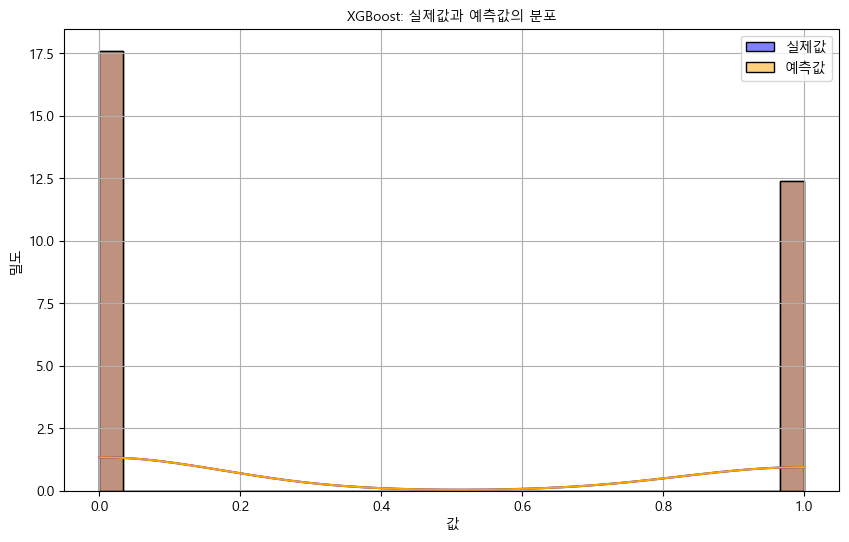

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 글꼴 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 경로
font_prop = fm.FontProperties(fname=font_path)

# matplotlib의 기본 폰트를 변경하여 한글 글꼴 사용
plt.rc('font', family=font_prop.get_name())


plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='실제값', kde=True, stat='density', bins=30, alpha=0.5)
sns.histplot(y_pred_xgb, color='orange', label='예측값', kde=True, stat='density', bins=30, alpha=0.5)
plt.title('XGBoost: 실제값과 예측값의 분포', fontproperties=font_prop)
plt.xlabel('값', fontproperties=font_prop)
plt.ylabel('밀도', fontproperties=font_prop)
plt.legend()
plt.grid()
plt.show()

혼동 행렬(Confusion Matrix) 

이진 분류 및 다중 클래스 분류 문제에서 모델의 성능을 평가하는 데 사용되는 표 형식의 도구이다.   
각 클래스에 대한 모델의 예측 결과를 시각적으로 나타내며,   
올바른 예측과 잘못된 예측을 구분하는 데 도움이 된다

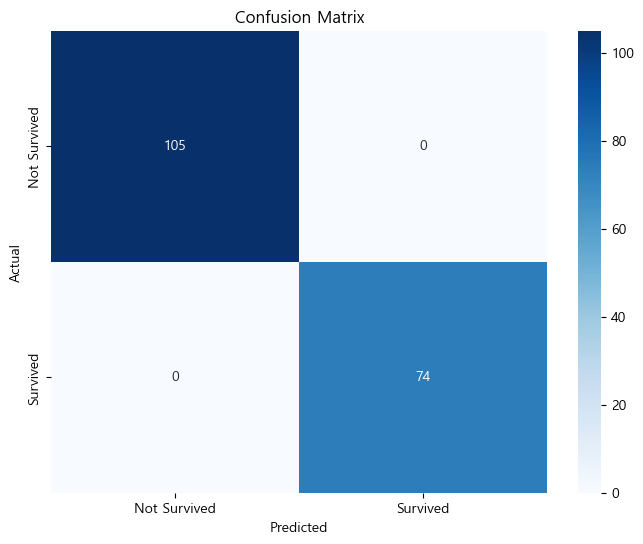

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# y_test: 실제 값, y_pred: 예측 값
# 예시로 임의의 데이터를 사용

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred_xgb)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

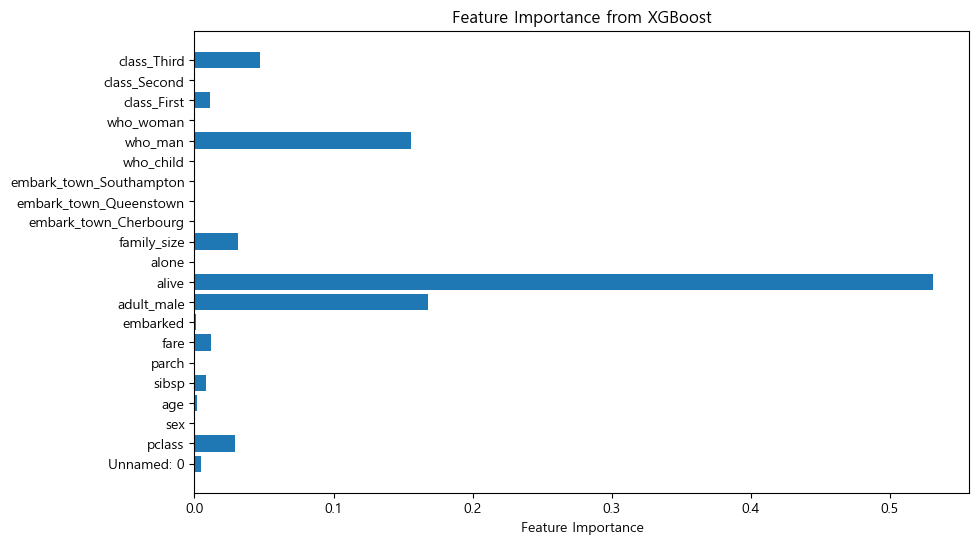

In [17]:
import xgboost as xgb


# 특성 중요도 추출
importance = best_model.feature_importances_

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost')
plt.show()